In [257]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%ls

QVI_purchase_behaviour.csv  Task One.ipynb
QVI_transaction_data.xlsx


In [9]:
purchase_behav = pd.read_csv('QVI_purchase_behaviour.csv')
transaction = pd.read_excel('QVI_transaction_data.xlsx')


In [82]:
purchase_behav_df = purchase_behav.copy()
transaction_df = transaction.copy()

### 1. Overall of Transaction

In [83]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [84]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [85]:
purchase_behav_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [86]:
purchase_behav_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [87]:
#change the time format
transaction_df.DATE = pd.to_datetime(transaction_df.DATE, unit='D',
               origin=pd.Timestamp("1899-12-30"))

In [88]:
transaction_df.head(),print(transaction_df.DATE.dtype)

datetime64[ns]


(        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 0 2018-10-17          1            1000       1         5   
 1 2019-05-14          1            1307     348        66   
 2 2019-05-20          1            1343     383        61   
 3 2018-08-17          2            2373     974        69   
 4 2018-08-18          2            2426    1038       108   
 
                                   PROD_NAME  PROD_QTY  TOT_SALES  
 0    Natural Chip        Compny SeaSalt175g         2        6.0  
 1                  CCs Nacho Cheese    175g         3        6.3  
 2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
 3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
 4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  ,
 None)

In [89]:
#get words in the NAME and get the frequency of these food. Only select Chips
transaction_df.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [90]:
prod_name = transaction_df['PROD_NAME'].str.replace(r'\s*\d+g$', '', regex=True)

In [91]:
prod_name

0          Natural Chip        Compny SeaSalt
1                            CCs Nacho Cheese
2           Smiths Crinkle Cut  Chips Chicken
3           Smiths Chip Thinly  S/Cream&Onion
4         Kettle Tortilla ChpsHny&Jlpno Chili
                         ...                 
264831     Kettle Sweet Chilli And Sour Cream
264832               Tostitos Splash Of  Lime
264833                       Doritos Mexicana
264834     Doritos Corn Chip Mexican Jalapeno
264835               Tostitos Splash Of  Lime
Name: PROD_NAME, Length: 264836, dtype: object

In [92]:
prod_name = prod_name.str.replace(r'&',' ')

In [93]:
prod_name = prod_name.str.split()
prod_name

0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3            [Smiths, Chip, Thinly, S/Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, Length: 264836, dtype: object

In [94]:
prod_freq = pd.value_counts([word for name in prod_name
                                for word in name]).sort_values(ascending=False)  

In [95]:
prod_freq.head(20)

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22063
Original    21560
Cut         20754
Chip        18645
Chicken     18577
Salsa       18094
Chilli      15390
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
Vinegar     12402
Name: count, dtype: int64

In [96]:
#here are some salsas in the list.so we need to remove them
prod_name

0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3            [Smiths, Chip, Thinly, S/Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, Length: 264836, dtype: object

In [97]:
transaction_df[transaction_df["PROD_NAME"].str.contains("[Ss]alsa")]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


In [98]:
transaction_df = transaction_df[~transaction_df["PROD_NAME"].str.contains("[Ss]alsa")]

In [99]:
transaction_df #246742(chips) + 18094(salsa) = 264836(all)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,43600,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,43605,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,43330,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,43600,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,43575,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,43554,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,43401,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,43476,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


In [102]:
transaction_df.shape

(246742, 8)

In [105]:
transaction_df.describe() # a simple describe of the cips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [111]:
# Check if there are any nulls in the dataset 
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [115]:
# Check if there are any nans in the dataset 
transaction_df.isna().values.any()

False

<Axes: >

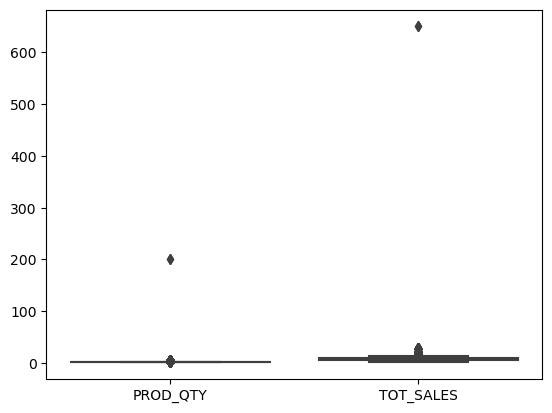

In [123]:
import seaborn as sns
#we concern about product quantity and total sales, and we want to find if there is any outliers
sns.boxplot(data=transaction_df.loc[:,["PROD_QTY","TOT_SALES"]])

In [125]:
transaction_df[transaction_df.PROD_QTY > 100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [126]:
transaction_df[transaction_df.TOT_SALES > 600]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [129]:
transaction_df = transaction_df.drop(index=[69762,69763])

In [130]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


<Axes: >

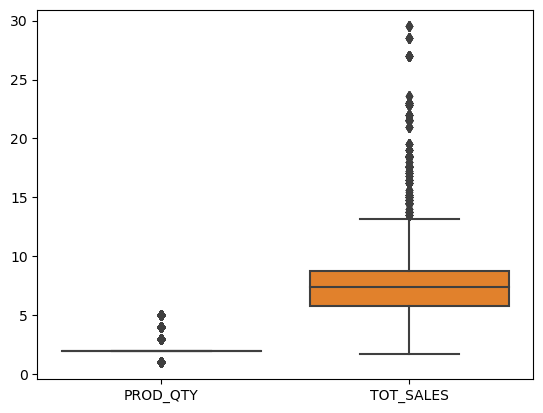

In [131]:
sns.boxplot(data=transaction_df.loc[:,["PROD_QTY","TOT_SALES"]])

In [132]:
transaction_df.shape

(246740, 8)

In [133]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [135]:
# Count the number of transactions by date
trans_by_date = transaction_df.groupby(["DATE"]).count()
trans_by_date.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660


In [136]:
trans_by_date.describe() # total days: 364

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143
std,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536
min,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
25%,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
50%,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
75%,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000
max,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000


In [150]:
# Create a sequence of dates and join this the count of transactions by date
# Create a column of dates that includes every day from 1 Jul 2018 to30 Jun 2019
dates_seq = pd.date_range("2018-07-01","2019-06-30")

# Join it onto the data to fill in the missing day.
fill_dates = trans_by_date.reindex(dates_seq)
fill_dates

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-07-01,663.0,663.0,663.0,663.0,663.0,663.0,663.0
2018-07-02,650.0,650.0,650.0,650.0,650.0,650.0,650.0
2018-07-03,674.0,674.0,674.0,674.0,674.0,674.0,674.0
2018-07-04,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2018-07-05,660.0,660.0,660.0,660.0,660.0,660.0,660.0
...,...,...,...,...,...,...,...
2019-06-26,657.0,657.0,657.0,657.0,657.0,657.0,657.0
2019-06-27,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2019-06-28,673.0,673.0,673.0,673.0,673.0,673.0,673.0
2019-06-29,703.0,703.0,703.0,703.0,703.0,703.0,703.0


In [152]:
fill_dates.index.difference(transaction_df["DATE"]) #Christmas Days, holiday

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [153]:
fill_dates.loc['2018-12-25',:] #missing NaN

STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25 00:00:00, dtype: float64

Text(0, 0.5, 'Transaction')

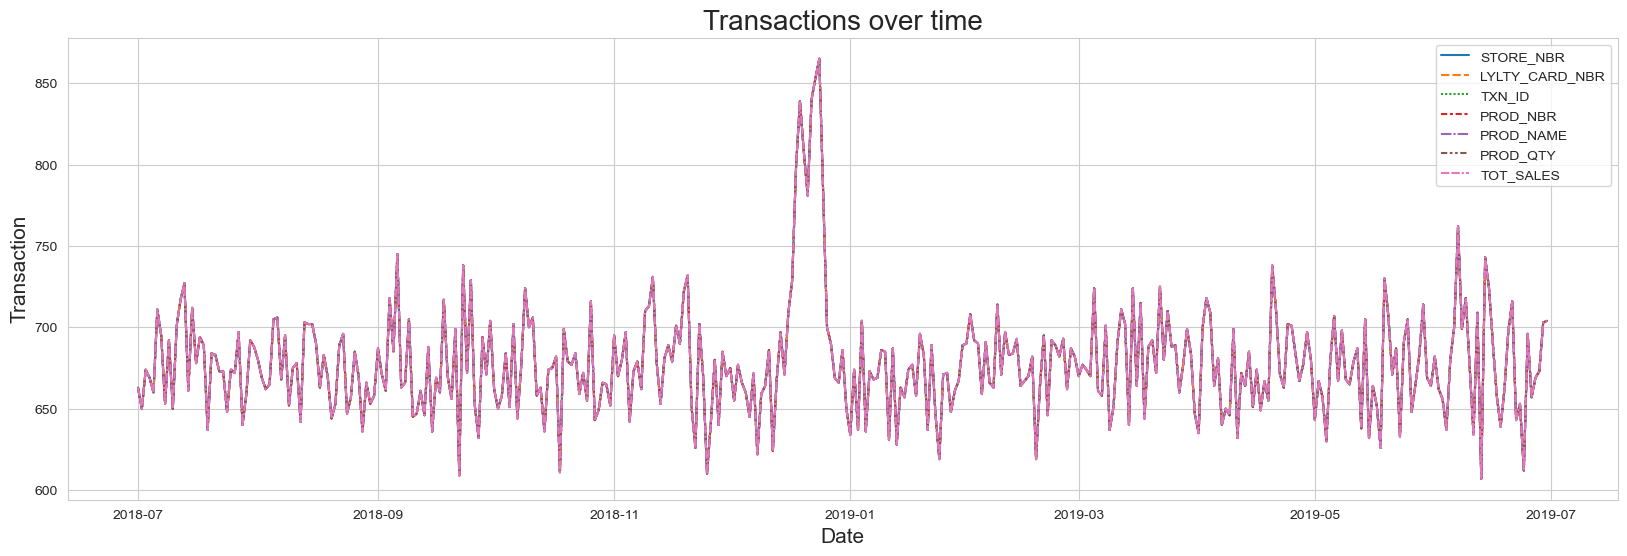

In [148]:
#plot the Transactions during the year
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.title("Transactions over time",fontsize=20)
sns.lineplot(data=fill_dates)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

Text(0, 0.5, 'Transaction')

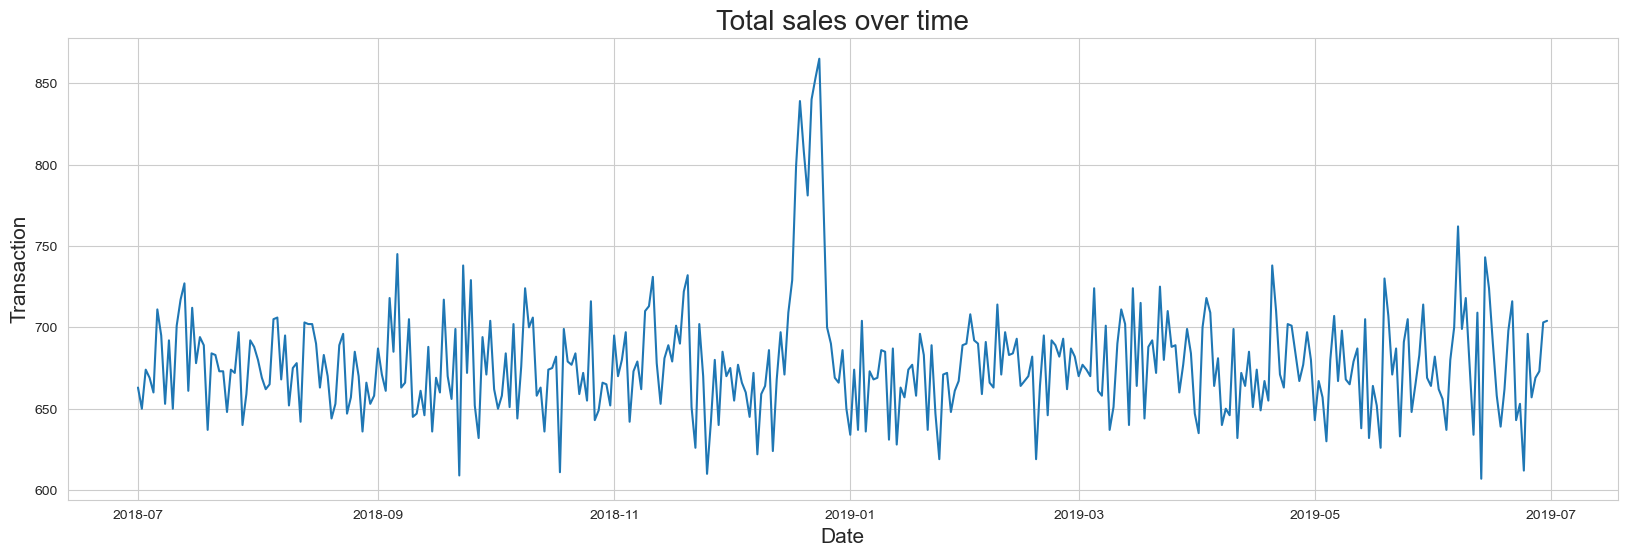

In [156]:
#plot the Total sales during the year
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.title("Total sales over time",fontsize=20)
sns.lineplot(data=trans_by_date.TOT_SALES)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

In [ ]:
#here we see a hug increase in december.so zoom in this month

Text(0, 0.5, 'Transaction')

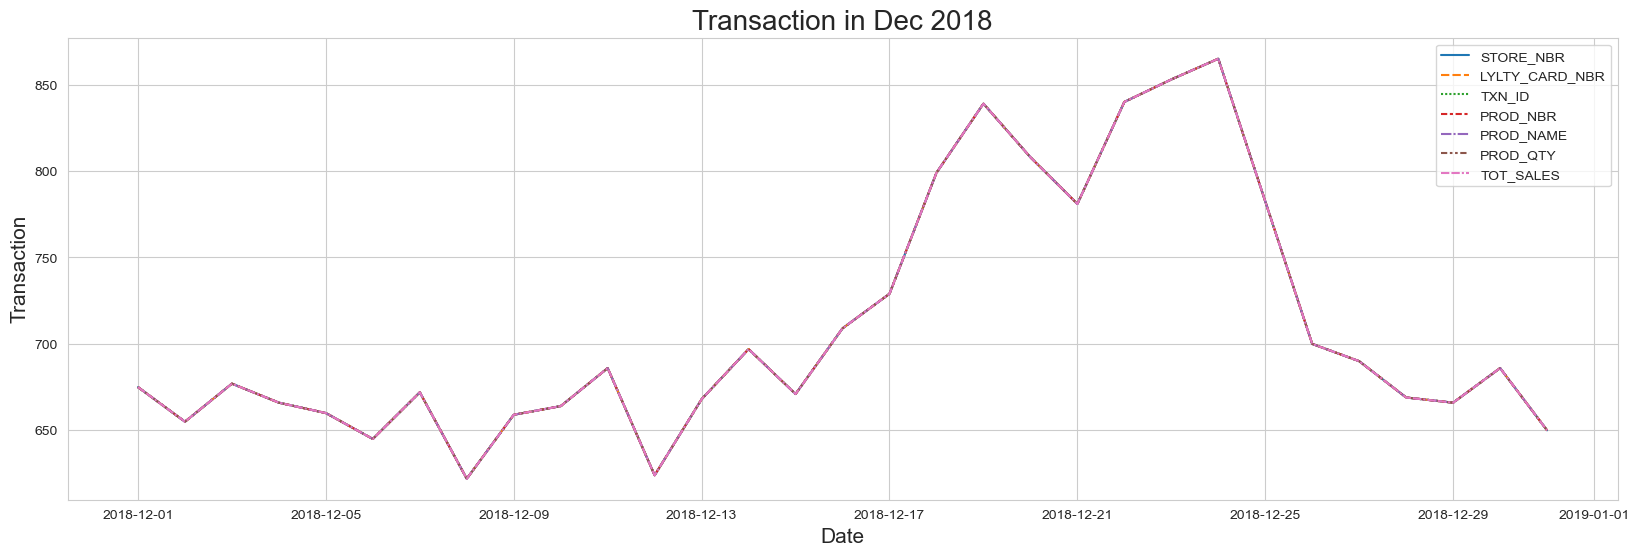

In [157]:
# Zoom in to December and look at individual days
plt.figure(figsize=(20,6))
plt.title("Transaction in Dec 2018",fontsize=20)
sns.lineplot(data=fill_dates.loc['2018-12-01':'2018-12-31',:])
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

In [158]:
#before Christmas Day: increase, after: go down. shops should be closed on Christmas day.

### 2. interesting features

#### 2.1 PICK SIZE

In [161]:
transaction_df["PICK_SIZE"] = transaction_df.PROD_NAME.str.extract("([0-9]+)").astype("float")

In [164]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PICK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


In [163]:
transaction_df.sort_values(by="PICK_SIZE")

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PICK_SIZE
40783,2018-09-25,97,97067,96696,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42461,2019-05-05,110,110030,111890,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
176183,2018-12-30,82,82183,81660,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
227309,2018-12-03,236,236091,239098,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42418,2018-11-05,109,109217,111470,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
...,...,...,...,...,...,...,...,...,...
192034,2019-03-12,100,100121,99145,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
255797,2019-01-19,235,235098,238018,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
233814,2019-01-24,151,151102,149810,4,Dorito Corn Chp Supreme 380g,1,6.5,380.0
131573,2018-07-09,213,213087,212416,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0


In [165]:
transaction_df.PICK_SIZE.describe()

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PICK_SIZE, dtype: float64

In [166]:
#The largest size is 380g and the smallest size is 70g

Text(0, 0.5, 'PICK SIZE')

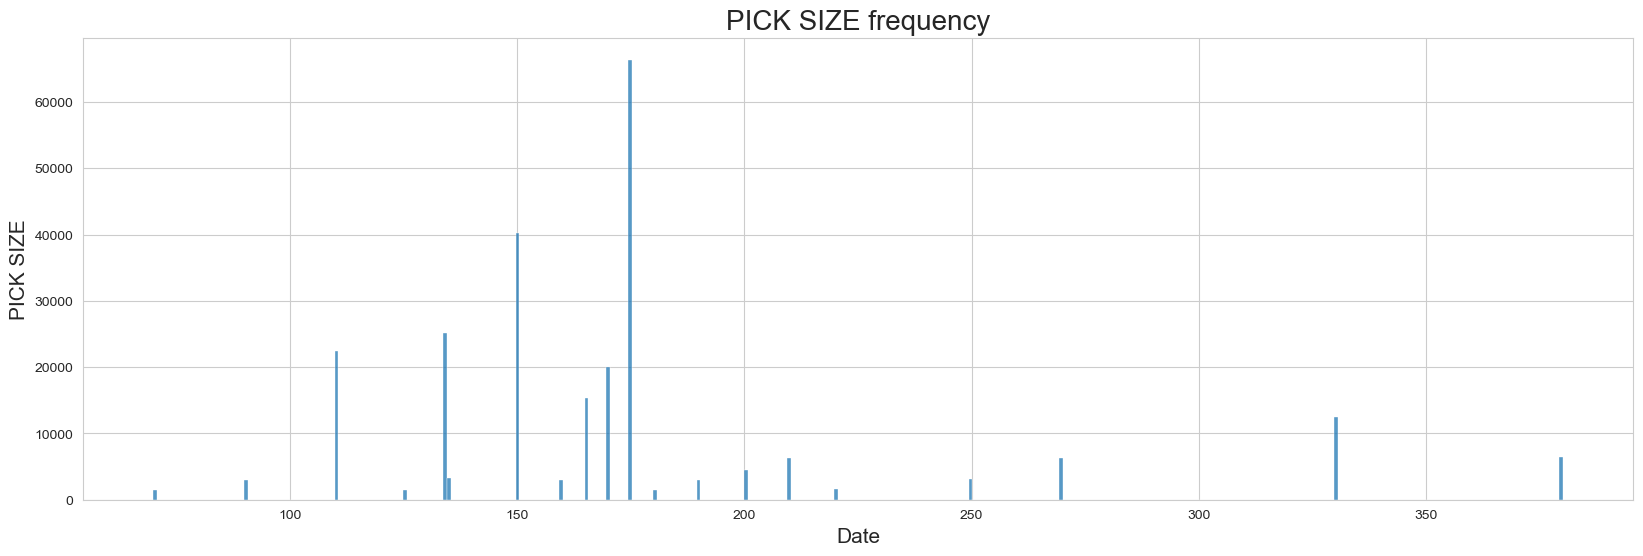

In [167]:
# plot a histgram by PICKGRAM
plt.figure(figsize=(20,6))
plt.title("PICK SIZE frequency",fontsize=20)
sns.histplot(data=transaction_df.PICK_SIZE)
plt.xlabel("Date",fontsize=15)
plt.ylabel("PICK SIZE",fontsize=15)

Text(0, 0.5, 'PICK TIMES')

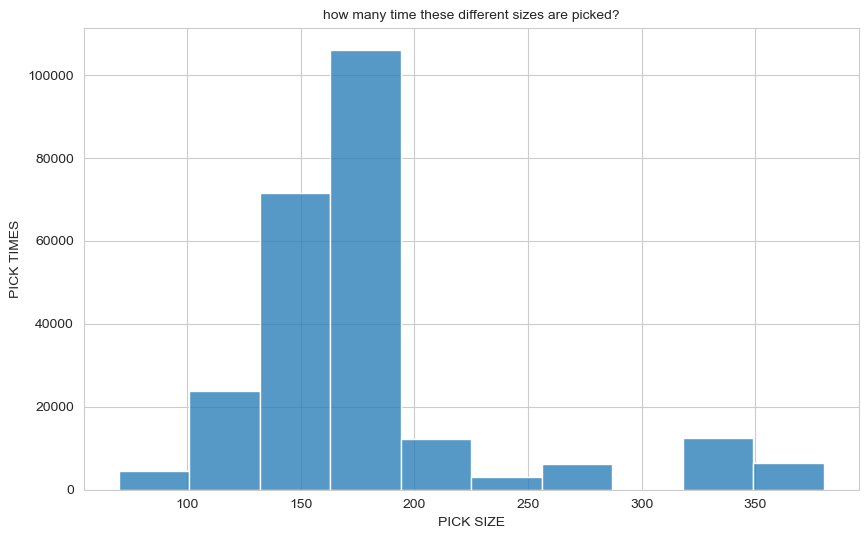

In [175]:
# plot a histgram by PICKGRAM
plt.figure(figsize=(10,6))
plt.title("how many time these different sizes are picked?",fontsize=10)
sns.histplot(data=transaction_df.PICK_SIZE, bins = 10)
plt.xlabel("PICK SIZE",fontsize=10)
plt.ylabel("PICK TIMES",fontsize=10)

In [ ]:
# It shows the popular sizes range from 150 to 200

#### 2.2 BRAND

In [242]:
transaction_df["BRAND"] = transaction_df["PROD_NAME"].str.split().str[0]

In [243]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PICK_SIZE,BRAND,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,Kettle


In [178]:
transaction_df.BRAND.describe()

count     246740
unique        28
top       Kettle
freq       41288
Name: BRAND, dtype: object

In [182]:
#the name of brands
brand_name = transaction_df.BRAND.unique()

In [183]:
brand_name 

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [186]:
brand_name.sort()
brand_name##it looks like they are of the same brands -

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

combine the same brands.
sure:
Dorito & Doritos 
'Infuzions' & 'Infzns'
'Smith' & 'Smiths'
'Sunbites' & 'Snbts'
'Woolworths' & 'WW'
not sure:
others


In [188]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]=="Burger"].head()

16     Burger Rings 220g
187    Burger Rings 220g
303    Burger Rings 220g
537    Burger Rings 220g
564    Burger Rings 220g
Name: PROD_NAME, dtype: object

In [189]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]=="CCs"].head()

1      CCs Nacho Cheese    175g
15            CCs Original 175g
154           CCs Original 175g
164    CCs Tasty Cheese    175g
210           CCs Original 175g
Name: PROD_NAME, dtype: object

In [190]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[2]].head()

139                Cheetos Puffs 165g
228    Cheetos Chs & Bacon Balls 190g
313    Cheetos Chs & Bacon Balls 190g
453                Cheetos Puffs 165g
472    Cheetos Chs & Bacon Balls 190g
Name: PROD_NAME, dtype: object

In [191]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[3]].head()

19     Cheezels Cheese Box 125g
128        Cheezels Cheese 330g
218        Cheezels Cheese 330g
226    Cheezels Cheese Box 125g
235        Cheezels Cheese 330g
Name: PROD_NAME, dtype: object

In [192]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[4]].head()

73     Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
81               Cobs Popd Sea Salt  Chips 110g
98     Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
100      Cobs Popd Sour Crm  &Chives Chips 110g
108    Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
Name: PROD_NAME, dtype: object

In [193]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[7]].head()

86      French Fries Potato Chips 175g
680     French Fries Potato Chips 175g
780     French Fries Potato Chips 175g
1299    French Fries Potato Chips 175g
1379    French Fries Potato Chips 175g
Name: PROD_NAME, dtype: object

In [194]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[8]].head()

7      Grain Waves         Sweet Chilli 210g
9      Grain Waves Sour    Cream&Chives 210G
85     Grain Waves         Sweet Chilli 210g
181    Grain Waves         Sweet Chilli 210g
225    Grain Waves         Sweet Chilli 210g
Name: PROD_NAME, dtype: object

In [195]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[9]].head()
#'Grain'& 'GrnWves'

56     GrnWves Plus Btroot & Chilli Jam 180g
298    GrnWves Plus Btroot & Chilli Jam 180g
301    GrnWves Plus Btroot & Chilli Jam 180g
387    GrnWves Plus Btroot & Chilli Jam 180g
578    GrnWves Plus Btroot & Chilli Jam 180g
Name: PROD_NAME, dtype: object

In [198]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[12]].head()

4     Kettle Tortilla ChpsHny&Jlpno Chili 150g
11       Kettle Sensations   Siracha Lime 150g
23        Kettle Sea Salt     And Vinegar 175g
24    Kettle Tortilla ChpsHny&Jlpno Chili 150g
27                        Kettle Original 175g
Name: PROD_NAME, dtype: object

In [199]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[13]].head()

17     NCC Sour Cream &    Garden Chives 175g
21     NCC Sour Cream &    Garden Chives 175g
437    NCC Sour Cream &    Garden Chives 175g
535    NCC Sour Cream &    Garden Chives 175g
828    NCC Sour Cream &    Garden Chives 175g
Name: PROD_NAME, dtype: object

In [200]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[14]].head()
#'NCC'& 'Natural'

0       Natural Chip        Compny SeaSalt175g
40      Natural ChipCo      Hony Soy Chckn175g
75     Natural Chip Co     Tmato Hrb&Spce 175g
214    Natural Chip Co     Tmato Hrb&Spce 175g
234     Natural ChipCo      Hony Soy Chckn175g
Name: PROD_NAME, dtype: object

In [201]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[15]].head()


30    Pringles Sthrn FriedChicken 134g
31        Pringles Sweet&Spcy BBQ 134g
62    Pringles Sthrn FriedChicken 134g
66      Pringles SourCream  Onion 134g
89     Pringles Original   Crisps 134g
Name: PROD_NAME, dtype: object

In [202]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[16]].head()


92        RRD Chilli&         Coconut 150g
118       RRD Chilli&         Coconut 150g
140    RRD Sweet Chilli &  Sour Cream 165g
294    RRD Sweet Chilli &  Sour Cream 165g
302       RRD Chilli&         Coconut 150g
Name: PROD_NAME, dtype: object

In [203]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[17]].head()
#'RRD' & 'Red'

28        Red Rock Deli Thai  Chilli&Lime 150g
34     Red Rock Deli Sp    Salt & Truffle 150G
212    Red Rock Deli Sp    Salt & Truffle 150G
297       Red Rock Deli Thai  Chilli&Lime 150g
331    Red Rock Deli Sp    Salt & Truffle 150G
Name: PROD_NAME, dtype: object

In [209]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[22]].head()

14            Thins Chips Light&  Tangy 175g
33    Thins Chips         Originl saltd 175g
38            Thins Chips Light&  Tangy 175g
52          Thins Chips Seasonedchicken 175g
97      Thins Potato Chips  Hot & Spicy 175g
Name: PROD_NAME, dtype: object

In [211]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[23]].head()

132      Tostitos Lightly    Salted 175g
147        Tostitos Splash Of  Lime 175g
171    Tostitos Smoked     Chipotle 175g
255      Tostitos Lightly    Salted 175g
324    Tostitos Smoked     Chipotle 175g
Name: PROD_NAME, dtype: object

In [212]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[24]].head()

12           Twisties Cheese     270g
42               Twisties Chicken270g
69               Twisties Chicken270g
70    Twisties Cheese     Burger 250g
77    Twisties Cheese     Burger 250g
Name: PROD_NAME, dtype: object

In [213]:
transaction_df["PROD_NAME"].loc[transaction_df["BRAND"]==brand_name[25]].head()

59     Tyrrells Crisps     Lightly Salted 165g
116    Tyrrells Crisps     Lightly Salted 165g
195    Tyrrells Crisps     Lightly Salted 165g
201     Tyrrells Crisps     Ched & Chives 165g
202    Tyrrells Crisps     Lightly Salted 165g
Name: PROD_NAME, dtype: object

In [244]:
#rename the same brands
def rename_brand(line):
    name = line['BRAND']
    if name == "Infzns":
        return "Infuzions"
    elif name == "Red":
        return "RDD"
    elif name == "Grain":
        return "GrnWves"
    elif name == "Sunbites":
        return "Snbts"
    elif name == "Natural":
        return "NCC"
    elif name == "Woolworths":
        return "WW"
    elif name == "Smith":
        return "Smiths"
    elif name == "Dorito":
        return "Doritos"
    else:
        return name 
'''
'Dorito & Doritos'
'Infuzions' & 'Infzns'
'Smith' & 'Smiths'
'Sunbites' & 'Snbts'
'Woolworths' & 'WW'
----
'Grain'& 'GrnWves'
'NCC'& 'Natural'
'RRD' & 'Red'
'''
transaction_df["BRAND"] = transaction_df.apply(lambda line: rename_brand(line), axis=1)

In [245]:
len(transaction_df.BRAND.unique()),transaction_df.BRAND.unique()

(21,
 array(['NCC', 'CCs', 'Smiths', 'Kettle', 'GrnWves', 'Doritos', 'Twisties',
        'WW', 'Thins', 'Burger', 'Cheezels', 'Infuzions', 'RDD',
        'Pringles', 'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos',
        'Cheetos', 'Snbts'], dtype=object))

Text(0.5, 0, 'Transaction')

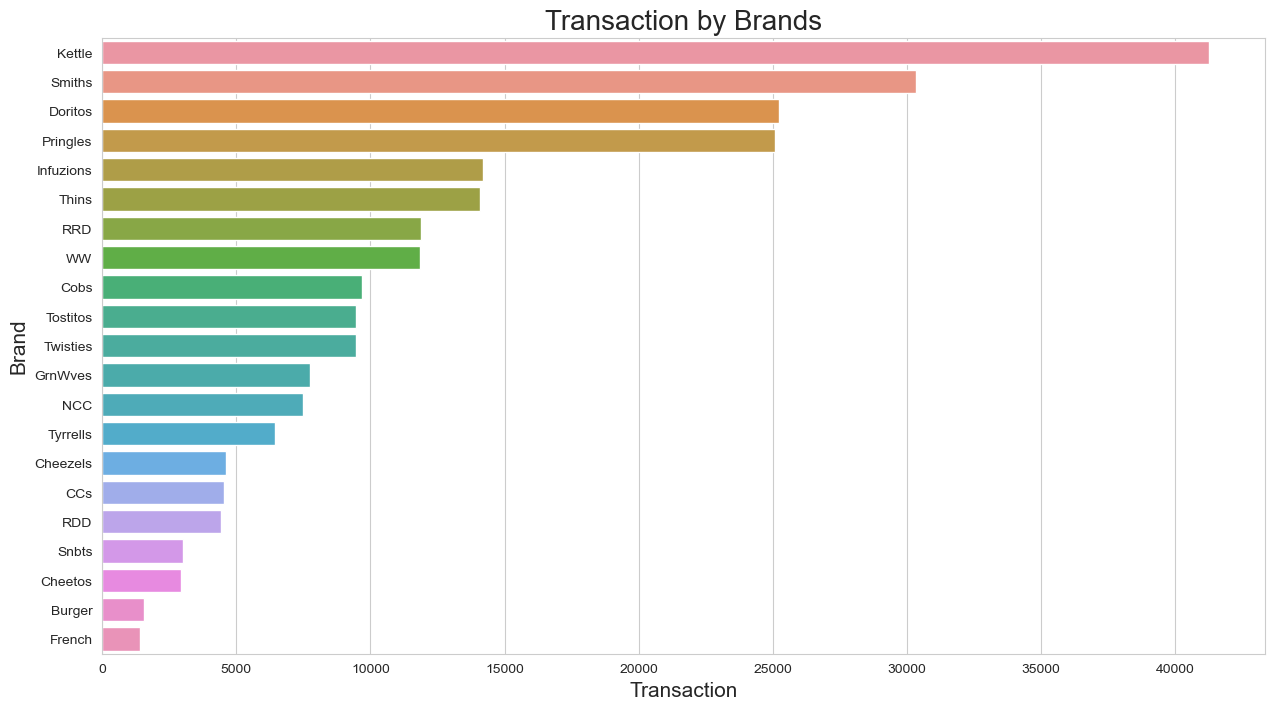

In [246]:
# Plot a barchart to show the total sales of each brand
plt.figure(figsize=(15,8))
sns.barplot(x = transaction_df["BRAND"].value_counts(),y=transaction_df["BRAND"].value_counts().index)
plt.title("Transaction by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)

In [229]:
#The bar chart clearly indicates that Kettle is the most popular chip brand.

### 3. Overall of Purchase

In [230]:
purchase_behav_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [233]:
purchase_behav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [234]:
purchase_behav_df.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [235]:
purchase_behav_df.PREMIUM_CUSTOMER.unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

Text(0.5, 1.15, 'Distribution of Lifestage')

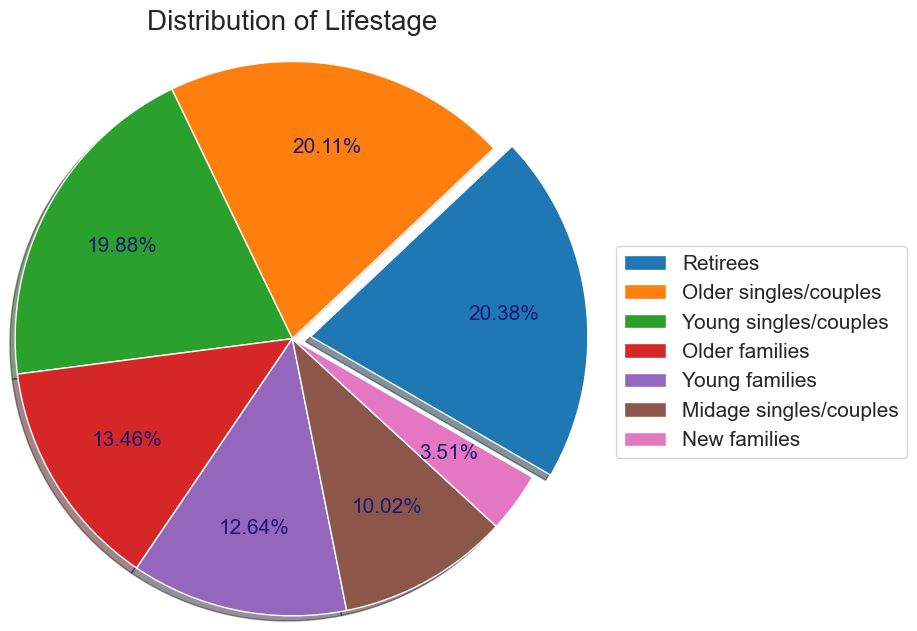

In [238]:
# Plot a pie chart of LIFESTAGE
plt.figure(figsize=(6,6))

plt.pie(purchase_behav_df.LIFESTAGE.value_counts(), shadow=True, explode=(0.1,0,0,0,0,0,0),
                                              textprops= {'fontsize':15,'color':'midnightblue'},
                                              radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-30)
plt.legend(purchase_behav_df.LIFESTAGE.value_counts().index.str.capitalize(), fontsize=15,
                                                                        loc=2, 
                                                                        bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Lifestage", y=1.15, fontsize=20)

Text(0.5, 1.15, 'Distribution of PREMIUM_CUSTOMER')

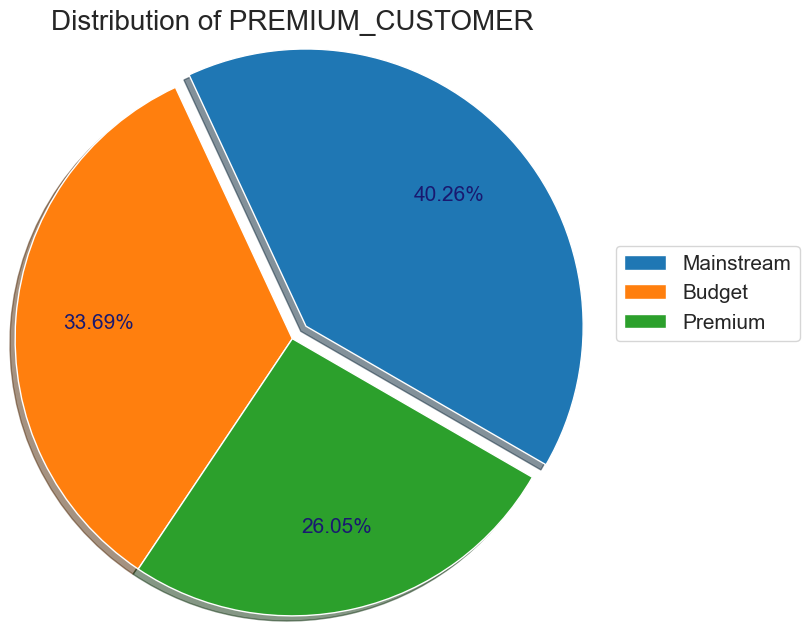

In [240]:
# Plot a pie chart of PREMIUM_CUSTOMER
plt.figure(figsize=(6,6))

plt.pie(purchase_behav_df.PREMIUM_CUSTOMER.value_counts(), shadow=True, explode=(0.1,0,0),
                                              textprops= {'fontsize':15,'color':'midnightblue'},
                                              radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-30)
plt.legend(purchase_behav_df.PREMIUM_CUSTOMER.value_counts().index.str.capitalize(), fontsize=15,
                                                                        loc=2, 
                                                                        bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of PREMIUM_CUSTOMER", y=1.15, fontsize=20)

### 4 Merge transcation & purchase

In [251]:
# Merge transaction data to customer data
transaction_customer = pd.merge(transaction_df, purchase_behav_df,on="LYLTY_CARD_NBR")
transaction_customer.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PICK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [252]:
transaction_customer.isnull().values.any() #no nulls

False

In [253]:
#save the full data
transaction_customer.to_csv("transaction_customer_data.csv")

### 5. Data analysis on customer segments

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction 
to understand what proportion of their grocery spend is on chips 
- Proportion of customers in each customer segment overall to compare against the 
mix of customers who purchase chips

#### 5.1 who spents the most

In [255]:
# total sales by LIFESTAGE and PREMIUM_CUSTOMER
totalsales_LIFE_PREM = pd.DataFrame(transaction_customer.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].sum())
totalsales_LIFE_PREM

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

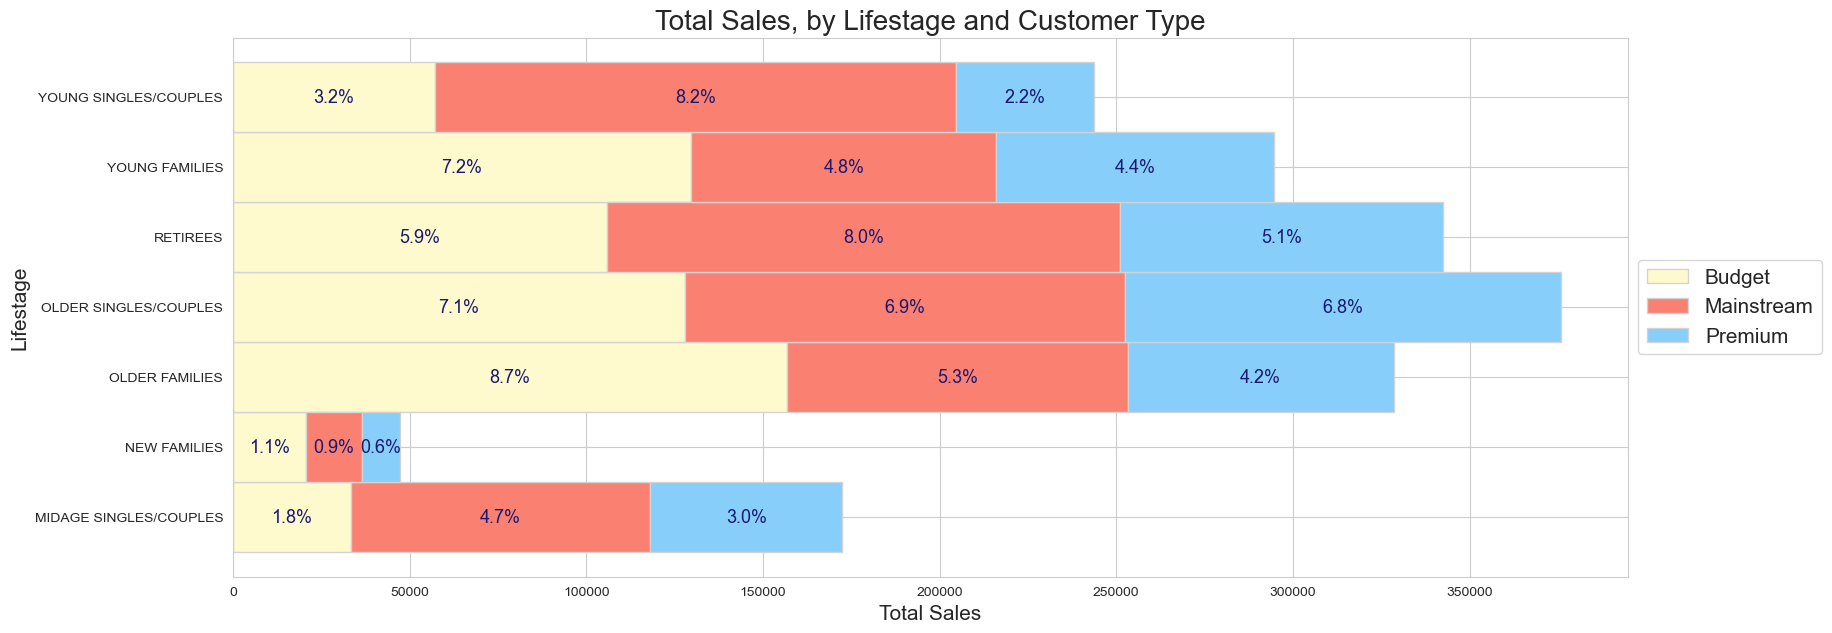

In [284]:
# https://github.com/victoriafy/Quantium-virtual-internship/blob/main/Quantium%20Virtual%20Internship%20Task%201.ipynb
# Values of each group
bars1 = totalsales_LIFE_PREM[totalsales_LIFE_PREM.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["TOT_SALES"]
bars2 = totalsales_LIFE_PREM[totalsales_LIFE_PREM.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["TOT_SALES"]
bars3 = totalsales_LIFE_PREM[totalsales_LIFE_PREM.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["TOT_SALES"]
bars_1_2 = totalsales_LIFE_PREM[totalsales_LIFE_PREM.index.get_level_values("PREMIUM_CUSTOMER").isin(["Budget","Mainstream"])]["TOT_SALES"]
#sum of first two columns
bars1_text = (bars1 / sum(totalsales_LIFE_PREM["TOT_SALES"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(totalsales_LIFE_PREM["TOT_SALES"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(totalsales_LIFE_PREM["TOT_SALES"])).apply("{:.1%}".format)

# Names of group and bar width
names = totalsales_LIFE_PREM.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3,left=bars_1_2.groupby('LIFESTAGE').apply('sum'), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
#if use np.add report error

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Total Sales",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

Conclusion: Sales are coming mainly from:
Top6:

- Budget - Older Families
- Mainstream - Young Singles/Couples
- Mainstream - Retirees
- Budget - Young Families
- Budget - Young Singles/Couples
- Premium - Older Singles/Couples

#### 5.2 How many customers are in each segment

In [290]:
num_custo = purchase_behav_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).count()

In [292]:
num_custo.columns = ["NUM_CUSTOMER"]

In [293]:
num_custo

NUM_CUSTOMER
LIFESTAGE              PREMIUM_CUSTOMER              
MIDAGE SINGLES/COUPLES Budget                    1504
                       Mainstream                3340
                       Premium                   2431
NEW FAMILIES           Budget                    1112
                       Mainstream                 849
                       Premium                    588
OLDER FAMILIES         Budget                    4675
                       Mainstream                2831
                       Premium                   2274
OLDER SINGLES/COUPLES  Budget                    4929
                       Mainstream                4930
                       Premium                   4750
RETIREES               Budget                    4454
                       Mainstream                6479
                       Premium                   3872
YOUNG FAMILIES         Budget                    4017
                       Mainstream                2728
                       Premium                   2433
YOUNG SINGLES/COUPLES  Budget                    3779
                       Mainstream                8088
                       Premium                   2574

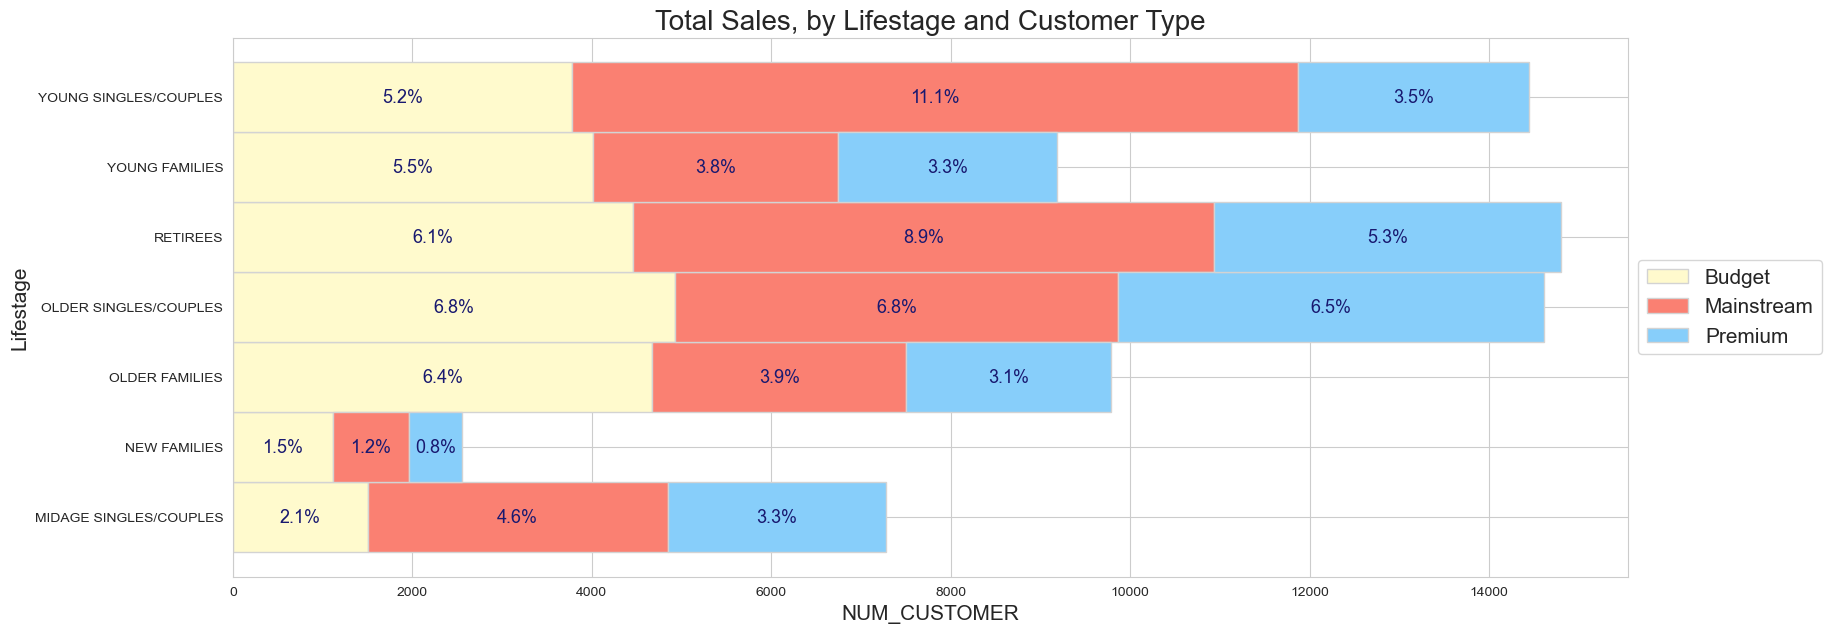

In [299]:
# https://github.com/victoriafy/Quantium-virtual-internship/blob/main/Quantium%20Virtual%20Internship%20Task%201.ipynb
# Values of each group
bars1 = num_custo[num_custo.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["NUM_CUSTOMER"]
bars2 = num_custo[num_custo.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["NUM_CUSTOMER"]
bars3 = num_custo[num_custo.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["NUM_CUSTOMER"]
bars_1_2 = num_custo[num_custo.index.get_level_values("PREMIUM_CUSTOMER").isin(["Budget","Mainstream"])]["NUM_CUSTOMER"]
#sum of first two columns
bars1_text = (bars1 / sum(num_custo["NUM_CUSTOMER"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(num_custo["NUM_CUSTOMER"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(num_custo["NUM_CUSTOMER"])).apply("{:.1%}".format)

# Names of group and bar width
names = num_custo.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3,left=bars_1_2.groupby('LIFESTAGE').apply('sum'), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
#if use np.add report error

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("NUM_CUSTOMER",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment

#### 5.3 How many chips are bought per customer by segment

In [303]:
merge_l_p = pd.merge(totalsales_LIFE_PREM,num_custo,on=["LIFESTAGE","PREMIUM_CUSTOMER"])
merge_l_p['SALES_QTY'] = transaction_customer.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
merge_l_p['AVG_SALES_QTY'] = (merge_l_p["SALES_QTY"]/merge_l_p["NUM_CUSTOMER"])
merge_l_p

TOT_SALES  NUM_CUSTOMER  SALES_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                                       
MIDAGE SINGLES/COUPLES Budget             33345.70          1504       8883   
                       Mainstream         84734.25          3340      21213   
                       Premium            54443.85          2431      14400   
NEW FAMILIES           Budget             20607.45          1112       5241   
                       Mainstream         15979.70           849       4060   
                       Premium            10760.80           588       2769   
OLDER FAMILIES         Budget            156863.75          4675      41853   
                       Mainstream         96413.55          2831      25804   
                       Premium            75242.60          2274      20239   
OLDER SINGLES/COUPLES  Budget            127833.60          4929      32883   
                       Mainstream        124648.50          4930      32607   
                       Premium           123537.55          4750      31695   
RETIREES               Budget            105916.30          4454      26932   
                       Mainstream        145168.95          6479      37677   
                       Premium            91296.65          3872      23266   
YOUNG FAMILIES         Budget            129717.95          4017      34482   
                       Mainstream         86338.25          2728      23194   
                       Premium            78571.70          2433      20901   
YOUNG SINGLES/COUPLES  Budget             57122.10          3779      15500   
                       Mainstream        147582.20          8088      36225   
                       Premium            39052.30          2574      10575   

                                         AVG_SALES_QTY  
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                 5.906250  
                       Mainstream             6.351198  
                       Premium                5.923488  
NEW FAMILIES           Budget                 4.713129  
                       Mainstream             4.782097  
                       Premium                4.709184  
OLDER FAMILIES         Budget                 8.952513  
                       Mainstream             9.114800  
                       Premium                8.900176  
OLDER SINGLES/COUPLES  Budget                 6.671333  
                       Mainstream             6.613996  
                       Premium                6.672632  
RETIREES               Budget                 6.046700  
                       Mainstream             5.815249  
                       Premium                6.008781  
YOUNG FAMILIES         Budget                 8.584018  
                       Mainstream             8.502199  
                       Premium                8.590629  
YOUNG SINGLES/COUPLES  Budget                 4.101614  
                       Mainstream             4.478858  
                       Premium                4.108392

Text(0, 0.5, 'Average Sales Quantity')

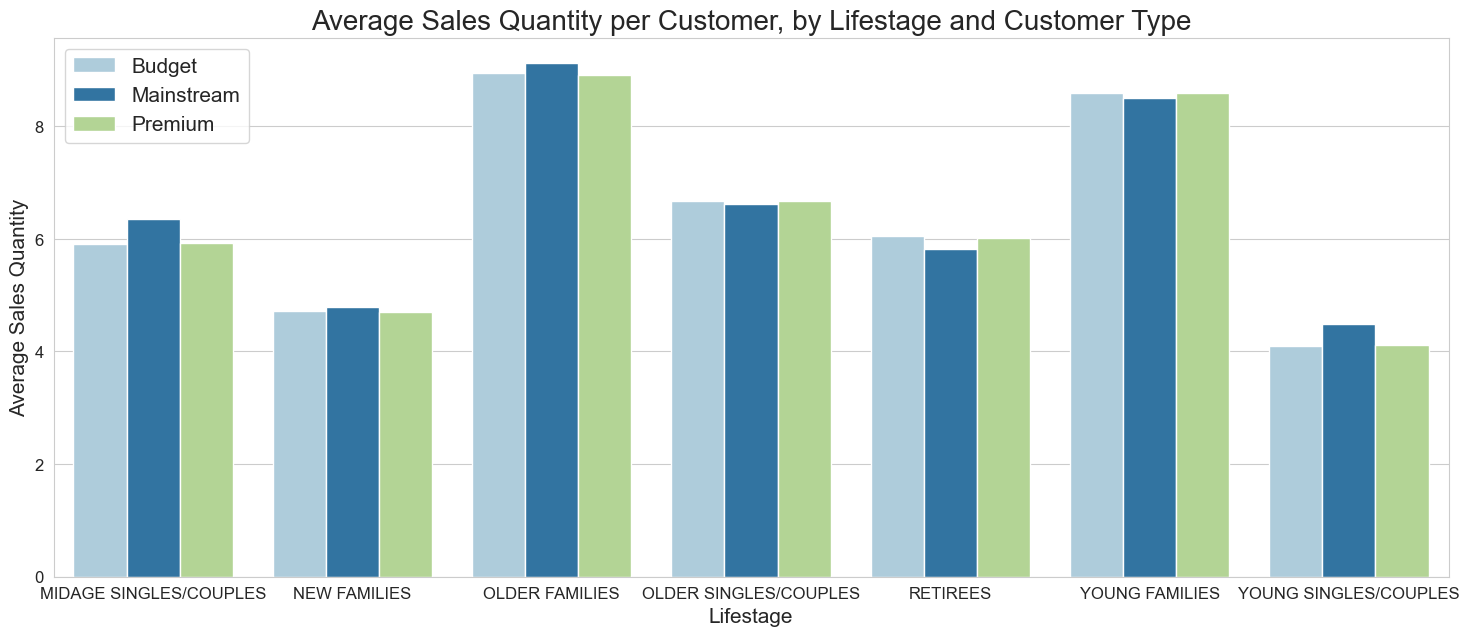

In [304]:
# Plot the average number of units per customer by those two dimensions
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_l_p.reset_index()["LIFESTAGE"], y=merge_l_p.reset_index()["AVG_SALES_QTY"], 
            hue=merge_l_p.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Quantity per Customer, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Quantity",fontsize=15)

Older families and young families in general buy more chips per customer

#### 5.4 What's the average chip price by customer segment

In [307]:
merge_l_p['AVG_SALES_PRICE'] = (merge_l_p["TOT_SALES"]/merge_l_p["SALES_QTY"])

In [308]:
merge_l_p

TOT_SALES  NUM_CUSTOMER  SALES_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                                       
MIDAGE SINGLES/COUPLES Budget             33345.70          1504       8883   
                       Mainstream         84734.25          3340      21213   
                       Premium            54443.85          2431      14400   
NEW FAMILIES           Budget             20607.45          1112       5241   
                       Mainstream         15979.70           849       4060   
                       Premium            10760.80           588       2769   
OLDER FAMILIES         Budget            156863.75          4675      41853   
                       Mainstream         96413.55          2831      25804   
                       Premium            75242.60          2274      20239   
OLDER SINGLES/COUPLES  Budget            127833.60          4929      32883   
                       Mainstream        124648.50          4930      32607   
                       Premium           123537.55          4750      31695   
RETIREES               Budget            105916.30          4454      26932   
                       Mainstream        145168.95          6479      37677   
                       Premium            91296.65          3872      23266   
YOUNG FAMILIES         Budget            129717.95          4017      34482   
                       Mainstream         86338.25          2728      23194   
                       Premium            78571.70          2433      20901   
YOUNG SINGLES/COUPLES  Budget             57122.10          3779      15500   
                       Mainstream        147582.20          8088      36225   
                       Premium            39052.30          2574      10575   

                                         AVG_SALES_QTY  AVG_SALES_PRICE  
LIFESTAGE              PREMIUM_CUSTOMER                                  
MIDAGE SINGLES/COUPLES Budget                 5.906250         3.753878  
                       Mainstream             6.351198         3.994449  
                       Premium                5.923488         3.780823  
NEW FAMILIES           Budget                 4.713129         3.931969  
                       Mainstream             4.782097         3.935887  
                       Premium                4.709184         3.886168  
OLDER FAMILIES         Budget                 8.952513         3.747969  
                       Mainstream             9.114800         3.736380  
                       Premium                8.900176         3.717703  
OLDER SINGLES/COUPLES  Budget                 6.671333         3.887529  
                       Mainstream             6.613996         3.822753  
                       Premium                6.672632         3.897698  
RETIREES               Budget                 6.046700         3.932731  
                       Mainstream             5.815249         3.852986  
                       Premium                6.008781         3.924037  
YOUNG FAMILIES         Budget                 8.584018         3.761903  
                       Mainstream             8.502199         3.722439  
                       Premium                8.590629         3.759232  
YOUNG SINGLES/COUPLES  Budget                 4.101614         3.685297  
                       Mainstream             4.478858         4.074043  
                       Premium                4.108392         3.692889

Text(0, 0.5, 'Average chip price')

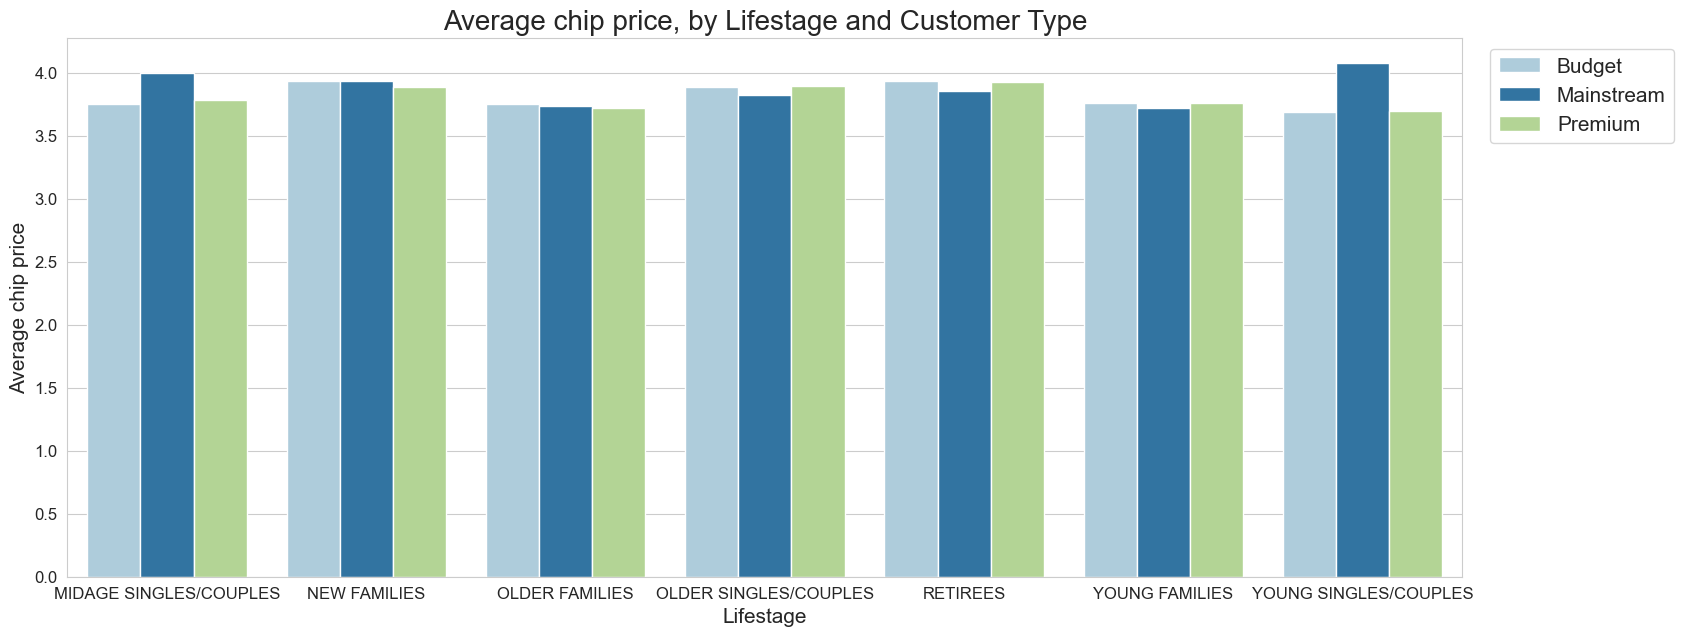

In [310]:
# Plot the average number of units per customer by those two dimensions
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_l_p.reset_index()["LIFESTAGE"], y=merge_l_p.reset_index()["AVG_SALES_PRICE"], 
            hue=merge_l_p.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Average chip price, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.02,0.98),borderaxespad = 0.)

plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average chip price",fontsize=15)

Mainstream midage singles/couples and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and  couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

#### 5.5 T-test
Perform an independent t-test between mainstream vs premium and budget midage and  young singles and couples

Perform a t-test to see if the difference is significan

In [312]:
from scipy.stats import ttest_ind

In [314]:
transaction_customer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PICK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium


In [318]:
merge_l_p.reset_index()

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,NUM_CUSTOMER,SALES_QTY,AVG_SALES_QTY,AVG_SALES_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,1504,8883,5.906250,3.753878
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,3340,21213,6.351198,3.994449
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,2431,14400,5.923488,3.780823
3,NEW FAMILIES,Budget,20607.45,1112,5241,4.713129,3.931969
4,NEW FAMILIES,Mainstream,15979.70,849,4060,4.782097,3.935887
5,NEW FAMILIES,Premium,10760.80,588,2769,4.709184,3.886168
6,OLDER FAMILIES,Budget,156863.75,4675,41853,8.952513,3.747969
7,OLDER FAMILIES,Mainstream,96413.55,2831,25804,9.114800,3.736380
8,OLDER FAMILIES,Premium,75242.60,2274,20239,8.900176,3.717703
9,OLDER SINGLES/COUPLES,Budget,127833.60,4929,32883,6.671333,3.887529


In [324]:
# Identify the groups to test the hypthesis with avg price
#merge_l_p = merge_l_p.reset_index()
mainstream = merge_l_p["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merge_l_p["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merge_l_p["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
premium_budget = merge_l_p["PREMIUM_CUSTOMER"] != "Mainstream"

group1 = merge_l_p[mainstream & young_midage].AVG_SALES_PRICE
group2 = merge_l_p[premium_budget & young_midage].AVG_SALES_PRICE

# Generate the t-test 
stat, pval = ttest_ind(group1.values, group2.values, equal_var=False)

print(pval, stat) # p < 0.05

0.031128004009301317 6.635796901874541


The t-test results in a p-value of 0.031128004009301317, i.e. the unit price for mainstream, 
young and mid-age singles and couples [ARE / ARE NOT] significantly higher than 
that of budget or premium, young and midage singles and couples

We might want to target customer segments that contribute the most to sales to 
retain them or further increase sales. Let's look at Mainstream - young 
singles/couples. For instance, let's find out if they tend to buy a particular 
brand of chips.

#### 5.6  affinity analysis or a-priori analysis

In [337]:
## Brands and package sizes of 'Mainstream - young singles/couples' Segment and other segments

M_y_c = pd.DataFrame(transaction_customer.loc[:,["LYLTY_CARD_NBR","LIFESTAGE","PREMIUM_CUSTOMER","BRAND","PICK_SIZE","PROD_QTY"]])

In [338]:
M_y_c =M_y_c[(M_y_c["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&(M_y_c["PREMIUM_CUSTOMER"]=="Mainstream")]

In [339]:
M_y_c.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PICK_SIZE,PROD_QTY
221345,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,150.0,1
221346,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,330.0,1
221347,1020,YOUNG SINGLES/COUPLES,Mainstream,GrnWves,180.0,1
221348,1163,YOUNG SINGLES/COUPLES,Mainstream,Kettle,175.0,1
221349,1163,YOUNG SINGLES/COUPLES,Mainstream,NCC,175.0,1


In [341]:
#brand in  young
M_y_c.BRAND.value_counts()

BRAND
Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Thins        1166
Twisties      900
Tostitos      890
Cobs          864
GrnWves       646
RRD           639
Tyrrells      619
WW            479
NCC           394
Cheezels      346
RDD           236
CCs           222
Cheetos       166
Snbts         128
French         78
Burger         62
Name: count, dtype: int64

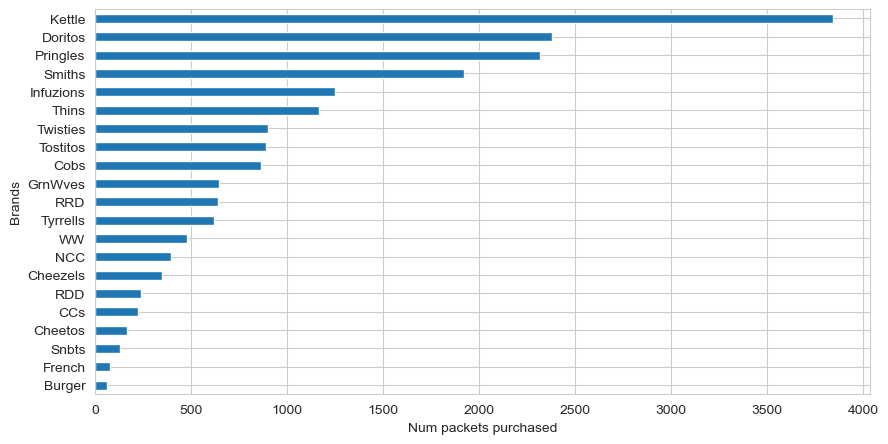

In [344]:
ax = M_y_c["BRAND"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))
ax.set_xlabel("Num packets purchased")
ax.set_ylabel("Brands")
plt.show()

In [345]:
#Top3 BRAND in YOUNG: the most popular one is Kettle
M_y_c.BRAND.value_counts().head(3)


BRAND
Kettle      3844
Doritos     2379
Pringles    2315
Name: count, dtype: int64

In [346]:
#PICK size in Mainstream-YOUNG
M_y_c.PICK_SIZE.value_counts()

PICK_SIZE
175.0    4997
150.0    3080
134.0    2315
110.0    2051
170.0    1575
330.0    1195
165.0    1102
380.0     626
270.0     620
210.0     576
135.0     290
250.0     280
200.0     179
190.0     148
90.0      128
160.0     128
180.0      70
70.0       63
220.0      62
125.0      59
Name: count, dtype: int64

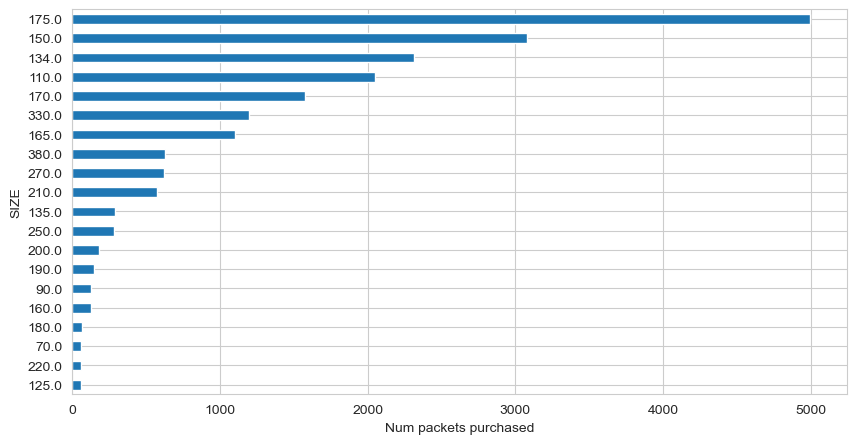

In [347]:
ax = M_y_c["PICK_SIZE"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))
ax.set_xlabel("Num packets purchased")
ax.set_ylabel("SIZE")
plt.show()

In [348]:
#Top3 SIZE in YOUNG: the most popular one is 175
M_y_c.PICK_SIZE.value_counts().head(3)

PICK_SIZE
175.0    4997
150.0    3080
134.0    2315
Name: count, dtype: int64

##### 5.6.1 Apriori analysis on brands

In [349]:
# Apriori analysis on brands
# Calculate sales quantity per brand per custermor in target segment
brand_s = M_y_c.groupby(["LYLTY_CARD_NBR","BRAND"])["PROD_QTY"].sum().unstack()
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item
basket_b = brand_s.applymap(lambda x : 1 if x>0 else 0)
basket_b

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,GrnWves,Infuzions,Kettle,...,Pringles,RDD,RRD,Smiths,Snbts,Thins,Tostitos,Twisties,Tyrrells,WW
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [352]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Frequent itemsets of our target segment
frequent_itemsets = apriori(basket_b, min_support=0.04, use_colnames=True)
frequent_itemsets.sort_values(by="support",ascending=False)

/Users/julie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
5,0.387142,(Kettle)
2,0.260326,(Doritos)
7,0.256158,(Pringles)
9,0.202476,(Smiths)
4,0.143110,(Infuzions)
10,0.136036,(Thins)
12,0.107364,(Twisties)
11,0.105848,(Tostitos)
1,0.103827,(Cobs)
20,0.091449,"(Pringles, Kettle)"


 we clearly see that customers in our target segement(Mainstream - young singles/couples) prefer Kettle more than other brands.

In [353]:
# Output of apriori analysis
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by=["lift","confidence","support"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Infuzions),(Pringles),0.143110,0.256158,0.041051,0.286849,1.119815,0.004392,1.043036,0.124864
0,(Pringles),(Infuzions),0.256158,0.143110,0.041051,0.160256,1.119815,0.004392,1.020419,0.143841



We can also prove an association among chips of different brands from the output of apriori analysis. More specifically, since lift > 1, which means that buying chips of one brand will boost sales of another brand chips, we can put chips of Infuzions and Pringles together for sale.

In [357]:
# Apriori analysis on package size
# Calculate sales quantity per package size per custermor in target segment
size_s = M_y_c.groupby(["LYLTY_CARD_NBR","PICK_SIZE"])["PROD_QTY"].sum().unstack()
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item
basket_size = size_s.applymap(lambda x : 1 if x>0 else 0)
basket_size

PICK_SIZE,70.0,90.0,110.0,125.0,134.0,135.0,150.0,160.0,165.0,170.0,175.0,180.0,190.0,200.0,210.0,220.0,250.0,270.0,330.0,380.0
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1018,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1060,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [361]:
# Frequent itemsets of our target segment
frequent_size = apriori(basket_size, min_support=0.06, use_colnames=True)
frequent_size.sort_values(by="support",ascending=False)

/Users/julie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
5,0.458254,(175.0)
2,0.313755,(150.0)
1,0.256158,(134.0)
0,0.224454,(110.0)
4,0.176835,(170.0)
8,0.139320,(330.0)
14,0.137931,"(150.0, 175.0)"
3,0.127700,(165.0)
13,0.111153,"(134.0, 175.0)"
11,0.094480,"(110.0, 175.0)"


175g is the most popular one in our selected segment

In [362]:
association_rules(frequent_size, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(165.0),(175.0),0.127700,0.458254,0.060124,0.470821,1.027423,0.001605,1.023747,0.030598
1,(175.0),(165.0),0.458254,0.127700,0.060124,0.131202,1.027423,0.001605,1.004031,0.049268


 recommands us to put chips of 175g and 165g together for sales.

### 6 conclusion

Top3 best-selling BRAND:
- Kettle
- Smiths
- Doritos

Top1 best-selling SIZE:
- 175.0g

Recommmend BRANDs together for sales:
- Infuzions and Pringles

Recommmend SIZEs together for sales:
- 165.0g and 175.0g

Top6 sales coming mainly from: 

- Budget - Older Families
- Mainstream - Young Singles/Couples
- Mainstream - Retirees
- Budget - Young Families
- Budget - Young Singles/Couples
- Premium - Older Singles/Couples

Customer Type :
- Mainstream 40.26%
- Budget 33.69%
- Premium 26.05%

Top 3 Lifestage :
- Retirees 20.38%
- Older Singles/Couples 20.11%
- Young Singles/Couples 19.88%

2）Recommendations
General :
- Increase sales promotion of Kettle (all size) and 175g (all brands) chips
Target segments :
    - Budget - Older Families :
        - Promotion like 'Buy Two Get One Free' :
        - Because of their higher average purchase quantity, promotions like this can boost sales.
    - Mainstream - Young Singles/Couples :
        - Target advertisements :
            This segment has the majority of customers and thus should be the focus of our marketing. Targeted advertising around areas such as colleges and universities is probably a good strategy.
        - Change the display area :
            Placing some chips next to other young people’s daily necessities will also attract their attention, thereby increasing sales.
        - Promotion and repackaging on popular brands and sizes :
            In addition to Kettle and 175g chips, which is popular among all segments, Doritos and Pringles are popular in this segement. Therefore, we can increase promotion of these chips as well as advice their productors and Suppliers to repackage their products. For instance, they can use more vibrant colors and fonts to gain love from young people. Meanwhile, similar strategy is also useful for 150g and 134g chips.
        - Strategies metioned above can be used in combination to maximize the effect.
    - Mainstream - Retirees :
        - Target advertisements :
Similar to last segment, we can put targeted advertising because of the large number of customers.
        - Limited time sales promotions during daytime :
Retired customers are more inclined to shop during daytime, so we can choose products that are popular in this segment for promotion when these customers visit.